# Azure Face API Demo

Azure Face is a cloud-based service that provides algorithms for face detection and recognition. The Face APIs comprise the following categories:

- Face Algorithm APIs: Cover core functions such as Detection, Find Similar, Verification, Identification, and Group.
- FaceList APIs: Used to manage a FaceList for Find Similar.
- LargePersonGroup Person APIs: Used to manage LargePersonGroup Person Faces for Identification.
- LargePersonGroup APIs: Used to manage a LargePersonGroup dataset for Identification.
- LargeFaceList APIs: Used to manage a LargeFaceList for Find Similar.
- PersonGroup Person APIs: Used to manage PersonGroup Person Faces for Identification.
- PersonGroup APIs: Used to manage a PersonGroup dataset for Identification.
- Snapshot APIs: Used to manage a Snapshot for data migration across subscriptions.

https://azure.microsoft.com/en-us/services/cognitive-services/face/

<img src="https://docs.microsoft.com/ja-jp/azure/cognitive-services/face/images/landmarks.1.jpg">

- **Accessories**. Whether the given face has accessories. This attribute returns possible accessories including headwear, glasses, and mask, with confidence score between zero and one for each accessory.
<br><br>
- **Age**. The estimated age in years of a particular face.
<br><br>
- **Blur**. The blurriness of the face in the image. This attribute returns a value between zero and one and an informal rating of low, medium, or high.
<br><br>
- **Emotion**. A list of emotions with their detection confidence for the given face. Confidence scores are normalized, and the scores across all emotions add up to one. The emotions returned are happiness, sadness, neutral, anger, contempt, disgust, surprise, and fear.
<br><br>
- **Exposure**. The exposure of the face in the image. This attribute returns a value between zero and one and an informal rating of underExposure, goodExposure, or overExposure.
<br><br>
- **Facial hair**. The estimated facial hair presence and the length for the given face.
<br><br>
- **Gender**. The estimated gender of the given face. Possible values are male, female, and genderless.
<br><br>
- **Glasses**. Whether the given face has eyeglasses. Possible values are NoGlasses, ReadingGlasses, Sunglasses, and Swimming Goggles.
<br><br>
- **Hair**. The hair type of the face. This attribute shows whether the hair is visible, whether baldness is detected, and what hair colors are detected.
<br><br>
- **Head pose**. The face's orientation in 3D space. This attribute is described by the roll, yaw, and pitch angles in degrees, which are defined according to the right-hand rule. The order of three angles is roll-yaw-pitch, and each angle's value range is from -180 degrees to 180 degrees. 3D orientation of the face is estimated by the roll, yaw, and pitch angles in order. 
<br><br>
- **Makeup**. Whether the face has makeup. This attribute returns a Boolean value for eyeMakeup and lipMakeup.
<br><br>
- **Mask**. Whether the face is wearing a mask. This attribute returns a possible mask type, and a Boolean value to indicate whether nose and mouth are covered.
<br><br>
- **Noise**. The visual noise detected in the face image. This attribute returns a value between zero and one and an informal rating of low, medium, or high.
<br><br>
- **Occlusion**. Whether there are objects blocking parts of the face. This attribute returns a Boolean value for eyeOccluded, foreheadOccluded, and mouthOccluded.
<br><br>
- **Smile**. The smile expression of the given face. This value is between zero for no smile and one for a clear smile.

In [1]:
# pip install azure-cognitiveservices-vision-face

In [2]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
import os
import requests
import matplotlib.pyplot as plt
from matplotlib import patches
import cv2
import pandas as pd
import urllib
import operator
import time

In [3]:
import sys
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [4]:
import platform
platform.version()

'#77~18.04.1-Ubuntu SMP Wed Mar 30 15:36:02 UTC 2022'

In [5]:
IMAGES_DIR = "images"
IMAGE_FILE = IMAGES_DIR + "/image1.jpg"

In [6]:
RESULTS_DIR = "results"

In [7]:
image = cv2.imread(IMAGE_FILE)
h, w, c = image.shape
print('Width:', w)
print('Height:', h)
print('Channel:', c)
print('Size:', image.size)

Width: 1008
Height: 672
Channel: 3
Size: 2032128


In [8]:
def ViewImage(myimage, w, h):
    image = cv2.imread(myimage)
    plt.figure(figsize = (w, h))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)

In [9]:
def ViewOpenCVImage(myimage, w, h):
    plt.figure(figsize = (w, h))
    image_rgb = cv2.cvtColor(myimage, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)

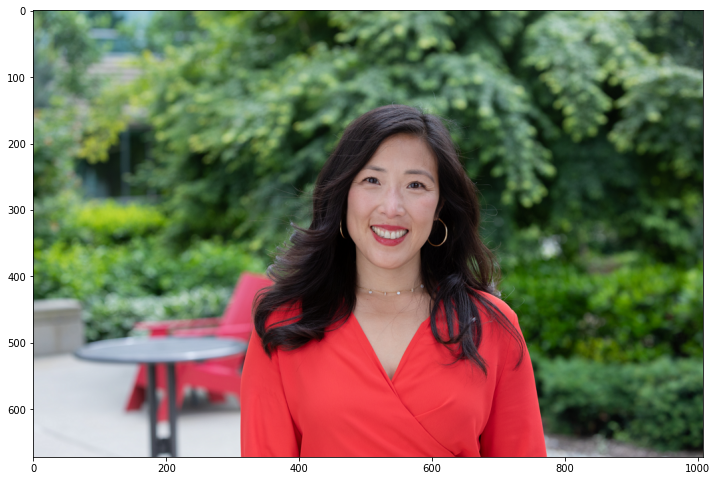

In [10]:
ViewImage(IMAGE_FILE, 12, 12)

## Face API

In [11]:
import configparser
config = configparser.ConfigParser()
# read the configuration file
config.read('config.ini')
# get all the connections
config.sections()

['AzureFaceAPI']

In [12]:
faceapi_key = config.get('AzureFaceAPI', 'faceapi_key')
faceapi_endpoint = config.get('AzureFaceAPI', 'faceapi_endpoint')

In [13]:
face_client = FaceClient(faceapi_endpoint, CognitiveServicesCredentials(faceapi_key))

In [14]:
faceimage = open(IMAGE_FILE, 'rb')
face_api_url = faceapi_endpoint + "face/v1.0/detect"
headers = {'Content-Type': 'application/octet-stream',
'Ocp-Apim-Subscription-Key': faceapi_key}

params = {
'returnFaceId': 'true',
'returnFaceLandmarks': 'true',
'returnFaceAttributes' : 'age, gender, headPose, smile, facialHair, glasses, emotion, hair, makeup,\
    occlusion, accessories, blur, exposure, noise',
'recognitionModel': 'recognition_04'
}

response = requests.post(face_api_url, params = params, headers = headers, data = faceimage)
response.raise_for_status()
faces = response.json()

In [15]:
faces

[{'faceId': 'b288d3c3-2053-4310-8cb2-709d79dadc54',
  'faceRectangle': {'top': 217, 'left': 463, 'width': 153, 'height': 153},
  'faceLandmarks': {'pupilLeft': {'x': 509.9, 'y': 255.2},
   'pupilRight': {'x': 575.4, 'y': 262.6},
   'noseTip': {'x': 537.8, 'y': 297.4},
   'mouthLeft': {'x': 507.2, 'y': 328.7},
   'mouthRight': {'x': 567.9, 'y': 332.7},
   'eyebrowLeftOuter': {'x': 485.0, 'y': 242.6},
   'eyebrowLeftInner': {'x': 530.0, 'y': 243.1},
   'eyeLeftOuter': {'x': 498.3, 'y': 255.9},
   'eyeLeftTop': {'x': 509.3, 'y': 251.2},
   'eyeLeftBottom': {'x': 507.6, 'y': 258.8},
   'eyeLeftInner': {'x': 519.1, 'y': 259.0},
   'eyebrowRightInner': {'x': 559.6, 'y': 245.6},
   'eyebrowRightOuter': {'x': 604.5, 'y': 259.6},
   'eyeRightInner': {'x': 564.3, 'y': 264.6},
   'eyeRightTop': {'x': 575.8, 'y': 259.2},
   'eyeRightBottom': {'x': 575.4, 'y': 266.9},
   'eyeRightOuter': {'x': 586.0, 'y': 265.7},
   'noseRootLeft': {'x': 534.5, 'y': 261.5},
   'noseRootRight': {'x': 551.4, 'y': 263

## Face ID

In [16]:
for face in faces:
    faceid = face['faceId']
    print("Face ID:", faceid)

Face ID: b288d3c3-2053-4310-8cb2-709d79dadc54


## Face ROI

In [17]:
for face in faces:
    faceRectangle = face['faceRectangle']
    print(faceRectangle)

{'top': 217, 'left': 463, 'width': 153, 'height': 153}


In [18]:
for face in faces:
    top = face['faceRectangle']['top']
    left = face['faceRectangle']['left']
    width = face['faceRectangle']['width']
    height = face['faceRectangle']['height']
    print(top, left, width, height)

217 463 153 153


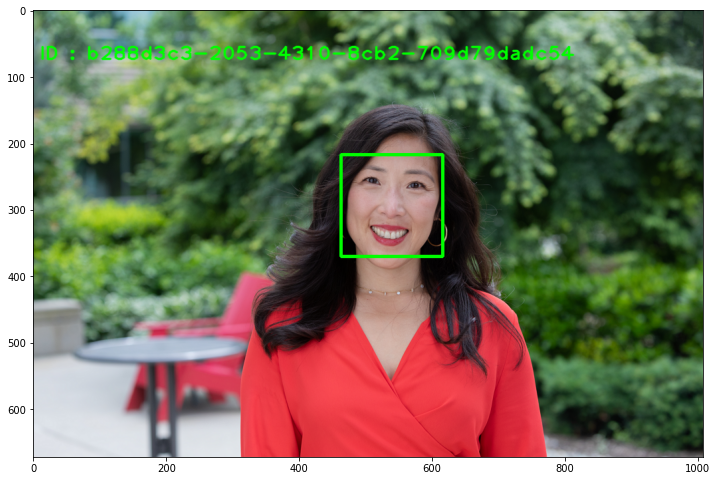

In [19]:
imagefaceapi = image.copy()

result_image = cv2.rectangle(imagefaceapi, (left, top), (left + width, top + height), (0, 255, 0), 3)
msg1 = 'ID : ' + str(faceid)
result_image = cv2.putText(result_image, msg1, (10, 75), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imwrite(RESULTS_DIR + "/imagefaceapi.jpg", result_image)

ViewOpenCVImage(result_image, 12, 12)

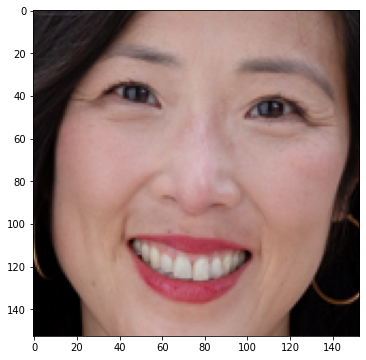

In [20]:
cropface = image.copy()
crop_img = cropface[top:top+height, left:left+width]
cv2.imwrite(RESULTS_DIR + "/crop_image.jpg", crop_img)
ViewOpenCVImage(crop_img, 6, 6)

## Face Attributes

In [21]:
for face in faces:
    faceAttributes = face['faceAttributes']
    print(faceAttributes)

{'smile': 1.0, 'headPose': {'pitch': -1.6, 'roll': 7.6, 'yaw': -0.6}, 'gender': 'female', 'age': 41.0, 'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0}, 'glasses': 'NoGlasses', 'emotion': {'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 1.0, 'neutral': 0.0, 'sadness': 0.0, 'surprise': 0.0}, 'blur': {'blurLevel': 'low', 'value': 0.0}, 'exposure': {'exposureLevel': 'goodExposure', 'value': 0.5}, 'noise': {'noiseLevel': 'low', 'value': 0.06}, 'makeup': {'eyeMakeup': True, 'lipMakeup': True}, 'accessories': [], 'occlusion': {'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}, 'hair': {'bald': 0.07, 'invisible': False, 'hairColor': [{'color': 'black', 'confidence': 0.99}, {'color': 'brown', 'confidence': 0.97}, {'color': 'gray', 'confidence': 0.37}, {'color': 'other', 'confidence': 0.16}, {'color': 'blond', 'confidence': 0.06}, {'color': 'red', 'confidence': 0.03}, {'color': 'white', 'confidence': 0.0}]}}


## Smile

In [22]:
for face in faces:
    smile = face['faceAttributes']['smile']
    print("Smile:", smile)

Smile: 1.0


## Facial Hair

In [23]:
for face in faces:
    facialHair = face['faceAttributes']['facialHair']
    print("facialHair:", facialHair)

facialHair: {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0}


In [24]:
for face in faces:
    moustache = face['faceAttributes']['facialHair']['moustache']
    print("Moustache:", moustache)

Moustache: 0.0


In [25]:
for face in faces:
    beard = face['faceAttributes']['facialHair']['beard']
    print("Beard:", beard)

Beard: 0.0


In [26]:
for face in faces:
    sideburns = face['faceAttributes']['facialHair']['sideburns']
    print("Sideburns:", sideburns)

Sideburns: 0.0


## MakeUp

In [27]:
for face in faces:
    makeup = face['faceAttributes']['makeup']
    print("Makeup:", makeup)

Makeup: {'eyeMakeup': True, 'lipMakeup': True}


In [28]:
for face in faces:
    eyeMakeup = face['faceAttributes']['makeup']['eyeMakeup']
    print("EyeMakeup:", eyeMakeup)

EyeMakeup: True


In [29]:
for face in faces:
    lipMakeup = face['faceAttributes']['makeup']['lipMakeup']
    print("LipMakeup:", lipMakeup)

LipMakeup: True


## Accessories

In [30]:
for face in faces:
    accessories = face['faceAttributes']['accessories']
    print(accessories)

[]


## Occlusion

In [31]:
for face in faces:
    occlusion = face['faceAttributes']['occlusion']
    print(occlusion)

{'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}


In [32]:
for face in faces:
    foreheadOccluded = face['faceAttributes']['occlusion']['foreheadOccluded']
    print("foreheadOccluded:", foreheadOccluded)

foreheadOccluded: False


In [33]:
for face in faces:
    eyeOccluded = face['faceAttributes']['occlusion']['eyeOccluded']
    print("eyeOccluded:", eyeOccluded)

eyeOccluded: False


In [34]:
for face in faces:
    mouthOccluded = face['faceAttributes']['occlusion']['mouthOccluded']
    print("mouthOccluded:", mouthOccluded)

mouthOccluded: False


## Head Pose

<img src="https://docs.microsoft.com/en-us/azure/cognitive-services/face/images/headpose.1.jpg">

In [35]:
for face in faces:
    headPose = face['faceAttributes']['headPose']
    print(headPose)

{'pitch': -1.6, 'roll': 7.6, 'yaw': -0.6}


In [36]:
for face in faces:
    pitch = face['faceAttributes']['headPose']['pitch']
    print("Pitch:", pitch)

Pitch: -1.6


In [37]:
for face in faces:
    roll = face['faceAttributes']['headPose']['roll']
    print("Roll:", roll)

Roll: 7.6


In [38]:
for face in faces:
    yaw = face['faceAttributes']['headPose']['yaw']
    print("Yaw:", yaw)

Yaw: -0.6


## Blur

In [39]:
for face in faces:
    blur = face['faceAttributes']['blur']
    print(blur)

{'blurLevel': 'low', 'value': 0.0}


In [40]:
for face in faces:
    blurLevel = face['faceAttributes']['blur']['blurLevel']
    print("blurLevel:", blurLevel)

blurLevel: low


In [41]:
for face in faces:
    value = face['faceAttributes']['blur']['value']
    print("Blur Value:", value)

Blur Value: 0.0


## Exposure

In [42]:
for face in faces:
    exposure = face['faceAttributes']['exposure']
    print(exposure)

{'exposureLevel': 'goodExposure', 'value': 0.5}


In [43]:
for face in faces:
    exposureLevel = face['faceAttributes']['exposure']['exposureLevel']
    print("exposureLevel:", exposureLevel)

exposureLevel: goodExposure


In [44]:
for face in faces:
    value = face['faceAttributes']['exposure']['value']
    print("Value:", value)

Value: 0.5


## Noise

In [45]:
for face in faces:
    noise = face['faceAttributes']['noise']
    print(noise)

{'noiseLevel': 'low', 'value': 0.06}


In [46]:
for face in faces:
    noiseLevel = face['faceAttributes']['noise']['noiseLevel']
    print("NoiseLevel:", noiseLevel)

NoiseLevel: low


In [47]:
for face in faces:
    value = face['faceAttributes']['noise']['value']
    print("Value:", value)

Value: 0.06


## Age

In [48]:
for face in faces:
    age = face['faceAttributes']['age']
    print("Age:", age)

Age: 41.0


## Gender

In [49]:
for face in faces:
    gender = face['faceAttributes']['gender']
    print("Gender:", gender)

Gender: female


## Glasses

In [50]:
for face in faces:
    glasses = face['faceAttributes']['glasses']
    print("Glasses:", glasses)

Glasses: NoGlasses


## Landmarks

In [51]:
for face in faces:
    faceLandmarks = face['faceLandmarks']
    print(faceLandmarks)

{'pupilLeft': {'x': 509.9, 'y': 255.2}, 'pupilRight': {'x': 575.4, 'y': 262.6}, 'noseTip': {'x': 537.8, 'y': 297.4}, 'mouthLeft': {'x': 507.2, 'y': 328.7}, 'mouthRight': {'x': 567.9, 'y': 332.7}, 'eyebrowLeftOuter': {'x': 485.0, 'y': 242.6}, 'eyebrowLeftInner': {'x': 530.0, 'y': 243.1}, 'eyeLeftOuter': {'x': 498.3, 'y': 255.9}, 'eyeLeftTop': {'x': 509.3, 'y': 251.2}, 'eyeLeftBottom': {'x': 507.6, 'y': 258.8}, 'eyeLeftInner': {'x': 519.1, 'y': 259.0}, 'eyebrowRightInner': {'x': 559.6, 'y': 245.6}, 'eyebrowRightOuter': {'x': 604.5, 'y': 259.6}, 'eyeRightInner': {'x': 564.3, 'y': 264.6}, 'eyeRightTop': {'x': 575.8, 'y': 259.2}, 'eyeRightBottom': {'x': 575.4, 'y': 266.9}, 'eyeRightOuter': {'x': 586.0, 'y': 265.7}, 'noseRootLeft': {'x': 534.5, 'y': 261.5}, 'noseRootRight': {'x': 551.4, 'y': 263.2}, 'noseLeftAlarTop': {'x': 525.1, 'y': 289.6}, 'noseRightAlarTop': {'x': 554.9, 'y': 290.9}, 'noseLeftAlarOutTip': {'x': 516.2, 'y': 300.3}, 'noseRightAlarOutTip': {'x': 560.0, 'y': 303.9}, 'upperL

In [52]:
for face in faces:
    faceLandmarks = face['faceLandmarks']
    pupilLeftx =  face['faceLandmarks']['pupilLeft']['x']
    pupilRightx =  face['faceLandmarks']['pupilRight']['x']
    noseTipx =  face['faceLandmarks']['noseTip']['x']
    mouthLeftx =  face['faceLandmarks']['mouthLeft']['x']
    mouthRightx =  face['faceLandmarks']['mouthRight']['x']
    eyebrowLeftOuterx =  face['faceLandmarks']['eyebrowLeftOuter']['x']
    eyebrowLeftInnerx =  face['faceLandmarks']['eyebrowLeftInner']['x']
    eyeLeftOuterx =  face['faceLandmarks']['eyeLeftOuter']['x']
    eyeLeftTopx =  face['faceLandmarks']['eyeLeftTop']['x']
    eyeLeftBottomx =  face['faceLandmarks']['eyeLeftBottom']['x']
    eyeLeftInnerx =  face['faceLandmarks']['eyeLeftInner']['x']
    eyebrowRightInnerx =  face['faceLandmarks']['eyebrowRightInner']['x']
    eyebrowRightOuterx =  face['faceLandmarks']['eyebrowRightOuter']['x']
    eyeRightInnerx =  face['faceLandmarks']['eyeRightInner']['x']
    eyeRightTopx =  face['faceLandmarks']['eyeRightTop']['x']
    eyeRightBottomx =  face['faceLandmarks']['eyeRightBottom']['x']
    eyeRightOuterx =  face['faceLandmarks']['eyeRightOuter']['x']
    noseRootLeftx =  face['faceLandmarks']['noseRootLeft']['x']
    noseRootRightx =  face['faceLandmarks']['noseRootRight']['x']
    noseLeftAlarTopx =  face['faceLandmarks']['noseLeftAlarTop']['x']
    noseRightAlarTopx =  face['faceLandmarks']['noseRightAlarTop']['x']
    noseLeftAlarOutTipx =  face['faceLandmarks']['noseLeftAlarOutTip']['x']
    noseRightAlarOutTipx =  face['faceLandmarks']['noseRightAlarOutTip']['x']
    upperLipTopx =  face['faceLandmarks']['upperLipTop']['x']
    upperLipBottomx =  face['faceLandmarks']['upperLipBottom']['x']
    underLipTopx =  face['faceLandmarks']['underLipTop']['x']
    underLipBottomx =  face['faceLandmarks']['underLipBottom']['x']

    pupilLefty =  face['faceLandmarks']['pupilLeft']['y']
    pupilRighty =  face['faceLandmarks']['pupilRight']['y']
    noseTipy =  face['faceLandmarks']['noseTip']['y']
    mouthLefty =  face['faceLandmarks']['mouthLeft']['y']
    mouthRighty =  face['faceLandmarks']['mouthRight']['y']
    eyebrowLeftOutery =  face['faceLandmarks']['eyebrowLeftOuter']['y']
    eyebrowLeftInnery =  face['faceLandmarks']['eyebrowLeftInner']['y']
    eyeLeftOutery =  face['faceLandmarks']['eyeLeftOuter']['y']
    eyeLeftTopy =  face['faceLandmarks']['eyeLeftTop']['y']
    eyeLeftBottomy =  face['faceLandmarks']['eyeLeftBottom']['y']
    eyeLeftInnery =  face['faceLandmarks']['eyeLeftInner']['y']
    eyebrowRightInnery =  face['faceLandmarks']['eyebrowRightInner']['y']
    eyebrowRightOutery =  face['faceLandmarks']['eyebrowRightOuter']['y']
    eyeRightInnery =  face['faceLandmarks']['eyeRightInner']['y']
    eyeRightTopy =  face['faceLandmarks']['eyeRightTop']['y']
    eyeRightBottomy =  face['faceLandmarks']['eyeRightBottom']['y']
    eyeRightOutery =  face['faceLandmarks']['eyeRightOuter']['y']
    noseRootLefty =  face['faceLandmarks']['noseRootLeft']['y']
    noseRootRighty =  face['faceLandmarks']['noseRootRight']['y']
    noseLeftAlarTopy =  face['faceLandmarks']['noseLeftAlarTop']['y']
    noseRightAlarTopy =  face['faceLandmarks']['noseRightAlarTop']['y']
    noseLeftAlarOutTipy =  face['faceLandmarks']['noseLeftAlarOutTip']['y']
    noseRightAlarOutTipy =  face['faceLandmarks']['noseRightAlarOutTip']['y']
    upperLipTopy =  face['faceLandmarks']['upperLipTop']['y']
    upperLipBottomy =  face['faceLandmarks']['upperLipBottom']['y']
    underLipTopy =  face['faceLandmarks']['underLipTop']['y']
    underLipBottomy =  face['faceLandmarks']['underLipBottom']['y']

In [53]:
sizecircle = 2
colorcircle = (0, 255, 0)
coloreye = (0, 0, 255)
colornose = (255, 0, 0)
colormouth = (0, 165, 255)

In [54]:
pupilLeft = cv2.circle(result_image, (int(pupilLeftx), int(pupilLefty)), 2, coloreye, sizecircle)
pupilRight = cv2.circle(result_image, (int(pupilRightx), int(pupilRighty)), 2, coloreye, sizecircle)
noseTip = cv2.circle(result_image, (int(noseTipx), int(noseTipy)), 2, colornose, sizecircle)
mouthLeft = cv2.circle(result_image, (int(mouthLeftx), int(mouthLefty)), 2, colormouth, sizecircle)
mouthRight = cv2.circle(result_image, (int(mouthRightx), int(mouthRighty)), 2, colormouth, sizecircle)
eyebrowLeftOuter = cv2.circle(result_image, (int(eyebrowLeftOuterx), int(eyebrowLeftOutery)), 2, colorcircle, sizecircle)
eyebrowLeftInner = cv2.circle(result_image, (int(eyebrowLeftInnerx), int(eyebrowLeftInnery)), 2, colorcircle, sizecircle)
eyeLeftOuter = cv2.circle(result_image, (int(eyeLeftOuterx), int(eyeLeftOutery)), 2, coloreye, sizecircle)
eyeLeftTop = cv2.circle(result_image, (int(eyeLeftTopx), int(eyeLeftTopy)), 2, coloreye, sizecircle)
eyeLeftBottom = cv2.circle(result_image, (int(eyeLeftBottomx), int(eyeLeftBottomy)), 2, coloreye, sizecircle)
eyeLeftInner = cv2.circle(result_image, (int(eyeLeftInnerx), int(eyeLeftInnery)), 2, coloreye, sizecircle)
eyebrowRightInner = cv2.circle(result_image, (int(eyebrowRightInnerx), int(eyebrowRightInnery)), 2, colorcircle, sizecircle)
eyebrowRightOuter = cv2.circle(result_image, (int(eyebrowRightOuterx), int(eyebrowRightOutery)), 2, colorcircle, sizecircle)
eyeRightInner = cv2.circle(result_image, (int(eyeRightInnerx), int(eyeRightInnery)), 2, coloreye, sizecircle)
eyeRightTop = cv2.circle(result_image, (int(eyeRightTopx), int(eyeRightTopy)), 2, coloreye, sizecircle)
eyeRightBottom = cv2.circle(result_image, (int(eyeRightBottomx), int(eyeRightBottomy)), 2, coloreye, sizecircle)
eyeRightOuter = cv2.circle(result_image, (int(eyeRightOuterx), int(eyeRightOutery)), 2, coloreye, sizecircle)
noseRootLeft = cv2.circle(result_image, (int(noseRootLeftx), int(noseRootLefty)), 2, colornose, sizecircle)
noseRootRight = cv2.circle(result_image, (int(noseRootRightx), int(noseRootRighty)), 2, colornose, sizecircle)
noseLeftAlarTop = cv2.circle(result_image, (int(noseLeftAlarTopx), int(noseLeftAlarTopy)), 2, colornose, sizecircle)
noseRightAlarTop = cv2.circle(result_image, (int(noseRightAlarTopx), int(noseRightAlarTopy)), 2, colornose, sizecircle)
noseLeftAlarOutTip = cv2.circle(result_image, (int(noseLeftAlarOutTipx), int(noseLeftAlarOutTipy)), 2, colornose, sizecircle)
noseRightAlarOutTip = cv2.circle(result_image, (int(noseRightAlarOutTipx), int(noseRightAlarOutTipy)), 2, colornose, sizecircle)
upperLipTop = cv2.circle(result_image, (int(upperLipTopx), int(upperLipTopy)), 2, colormouth, sizecircle)
upperLipBottom = cv2.circle(result_image, (int(upperLipBottomx), int(upperLipBottomy)), 2, colormouth, sizecircle)
underLipTop = cv2.circle(result_image, (int(underLipTopx), int(underLipTopy)), 2, colormouth, sizecircle)
underLipBottom = cv2.circle(result_image, (int(underLipBottomx), int(underLipBottomy)), 2, colormouth, sizecircle)

cv2.imwrite(RESULTS_DIR + "/facelandmarks.jpg", result_image)

True

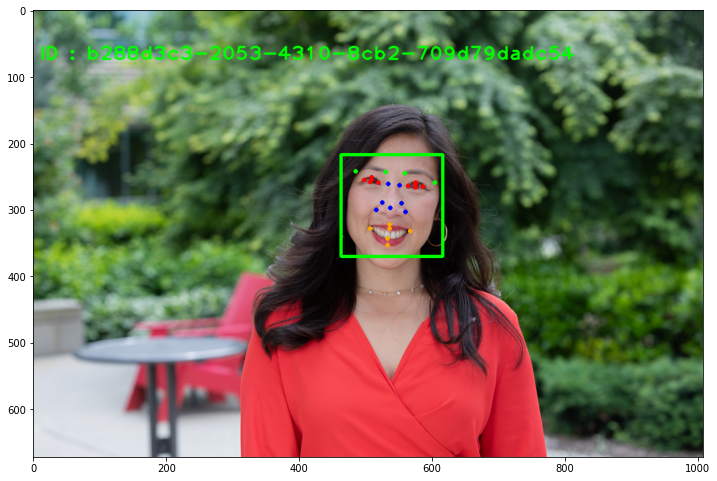

In [55]:
ViewOpenCVImage(result_image, 12, 12)

## Emotions

In [56]:
for face in faces:
    emotions = face['faceAttributes']['emotion']
    print(emotions)

{'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 1.0, 'neutral': 0.0, 'sadness': 0.0, 'surprise': 0.0}


In [57]:
topsentiment = max(emotions.items(), key=operator.itemgetter(1))[0]
probtopsentiment = max(emotions.items(), key=operator.itemgetter(1))[1]
print('Sentiment :', topsentiment, 'with confidence =', probtopsentiment)

Sentiment : happiness with confidence = 1.0


## Hair Color

In [58]:
for face in faces:
    hair = face['faceAttributes']['hair']
    print(hair)

{'bald': 0.07, 'invisible': False, 'hairColor': [{'color': 'black', 'confidence': 0.99}, {'color': 'brown', 'confidence': 0.97}, {'color': 'gray', 'confidence': 0.37}, {'color': 'other', 'confidence': 0.16}, {'color': 'blond', 'confidence': 0.06}, {'color': 'red', 'confidence': 0.03}, {'color': 'white', 'confidence': 0.0}]}


In [59]:
for face in faces:
    bald = face['faceAttributes']['hair']['bald']
    print("Bald:", bald)

Bald: 0.07


In [60]:
for face in faces:
    invisible = face['faceAttributes']['hair']['invisible']
    print("invisible:", invisible)

invisible: False


In [61]:
for face in faces:
    haircolor = face['faceAttributes']['hair']['hairColor']
    print(haircolor)

[{'color': 'black', 'confidence': 0.99}, {'color': 'brown', 'confidence': 0.97}, {'color': 'gray', 'confidence': 0.37}, {'color': 'other', 'confidence': 0.16}, {'color': 'blond', 'confidence': 0.06}, {'color': 'red', 'confidence': 0.03}, {'color': 'white', 'confidence': 0.0}]


In [62]:
count = prob = index = 0 

while count < len(haircolor):
    prob1 = haircolor[count]['confidence']
    if prob < prob1:
        prob = prob1
        index = count
    count += 1
    
haircolormax = haircolor[index]['color']
haircolorscoremax = haircolor[index]['confidence']
print("Haircolor prediction:", haircolormax, 'with score =', haircolorscoremax)

Haircolor prediction: black with score = 0.99
